In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv('CarPrice_Advanced_Regularization.csv')
data.head()

,CarAge,Mileage,EngineSize,HorsePower,FuelType,Transmission,OwnerType,Seats,CityMileage,HighwayMileage,SafetyRating,CarPrice
0,7,60609,3.9,290.0,Diesel,Automatic,Second,5,11.0,16.9,4.9,60.91
1,4,36024,1.4,209.0,Petrol,Manual,First,5,18.7,22.6,2.6,41.04
2,13,75313,3.2,258.0,Petrol,Manual,First,5,16.0,21.5,3.8,50.14
3,11,132813,3.8,330.0,Petrol,Manual,Second,5,15.2,19.6,4.3,49.16
4,8,100285,1.5,220.0,Petrol,Automatic,Second,5,18.8,22.3,4.7,38.71


In [3]:
x = data.iloc[: , :-1]
y = data.iloc[: , -1]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CarAge          500 non-null    int64  
 1   Mileage         500 non-null    int64  
 2   EngineSize      500 non-null    float64
 3   HorsePower      500 non-null    float64
 4   FuelType        500 non-null    object 
 5   Transmission    500 non-null    object 
 6   OwnerType       500 non-null    object 
 7   Seats           500 non-null    int64  
 8   CityMileage     500 non-null    float64
 9   HighwayMileage  500 non-null    float64
 10  SafetyRating    500 non-null    float64
 11  CarPrice        500 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 47.0+ KB


In [5]:
data.isnull().sum()

CarAge            0
Mileage           0
EngineSize        0
HorsePower        0
FuelType          0
Transmission      0
OwnerType         0
Seats             0
CityMileage       0
HighwayMileage    0
SafetyRating      0
CarPrice          0
dtype: int64

In [6]:
arr = ['FuelType','Transmission','OwnerType']
for i in arr:
    print(data[i].unique())

['Diesel' 'Petrol' 'Electric']
['Automatic' 'Manual']
['Second' 'First' 'Third']


In [7]:
x = pd.get_dummies(x,columns = ['FuelType','Transmission','OwnerType'],drop_first = True,dtype = int)

In [8]:
x.head()

,CarAge,Mileage,EngineSize,HorsePower,Seats,CityMileage,HighwayMileage,SafetyRating,FuelType_Electric,FuelType_Petrol,Transmission_Manual,OwnerType_Second,OwnerType_Third
0,7,60609,3.9,290.0,5,11.0,16.9,4.9,0,0,0,1,0
1,4,36024,1.4,209.0,5,18.7,22.6,2.6,0,1,1,0,0
2,13,75313,3.2,258.0,5,16.0,21.5,3.8,0,1,1,0,0
3,11,132813,3.8,330.0,5,15.2,19.6,4.3,0,1,1,1,0
4,8,100285,1.5,220.0,5,18.8,22.3,4.7,0,1,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [11]:
len(x_train),len(y_train)

(400, 400)

In [12]:
len(x_test),len(y_test)

(100, 100)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()


In [15]:
reg.fit(x_train,y_train)

LinearRegression()

In [16]:
reg.coef_

array([-3.59917298e-01, -8.52320334e-05,  6.12191672e+00,  3.90835317e-02,
       -5.64064930e-02,  6.99293553e-02, -8.18878447e-02,  1.33576852e+00,
        7.65172185e+00, -1.05149460e-01, -1.59222283e+00, -2.77054239e-01,
       -4.60805779e-02])

In [70]:
df = pd.DataFrame()
df['column_names'] = x_train.columns
df['reg_m_values'] = reg.coef_


In [18]:
from sklearn.metrics import r2_score

In [19]:
print(f"Training accuracy : {r2_score(y_train,reg.predict(x_train))*100}")
print(f"Testing accuracy : {r2_score(y_test,reg.predict(x_test))*100}")

Training accuracy : 97.16615298030186
Testing accuracy : 96.76082493476173


**Ridge Regression**

In [21]:
from sklearn.linear_model import Ridge

In [22]:
ridge = Ridge(alpha = 1)

In [23]:
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [25]:
ridge.coef_

array([-3.60502980e-01, -8.50124150e-05,  6.06348611e+00,  3.97285101e-02,
       -5.08990622e-02,  6.77852266e-02, -7.68422045e-02,  1.33393680e+00,
        7.37795941e+00, -1.64107696e-01, -1.57641608e+00, -2.85138661e-01,
       -5.50943892e-02])

In [72]:
df['ridge_m_values'] = ridge.coef_


In [36]:
print(f"Training accuracy : {r2_score(y_train,ridge.predict(x_train))*100}")
print(f"Testing accuracy : {r2_score(y_test,ridge.predict(x_test))*100}")

Training accuracy : 97.15854095620861
Testing accuracy : 96.73927900908166


**Lasso Regression**

In [47]:
from sklearn.linear_model import Lasso

In [52]:
lasso = Lasso(alpha = 1)

In [54]:
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [59]:
lasso.coef_

array([-3.16731849e-01, -7.70088387e-05,  2.57764875e+00,  8.21320240e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00])

In [61]:
df['lasso_m_values']  = lasso.coef_

In [63]:
print(f"Training accuracy : {r2_score(y_train,lasso.predict(x_train))*100}")
print(f"Testing accuracy : {r2_score(y_test,lasso.predict(x_test))*100}")

Training accuracy : 84.46454320545588
Testing accuracy : 79.30776195477803


<Figure size 1200x600 with 0 Axes>

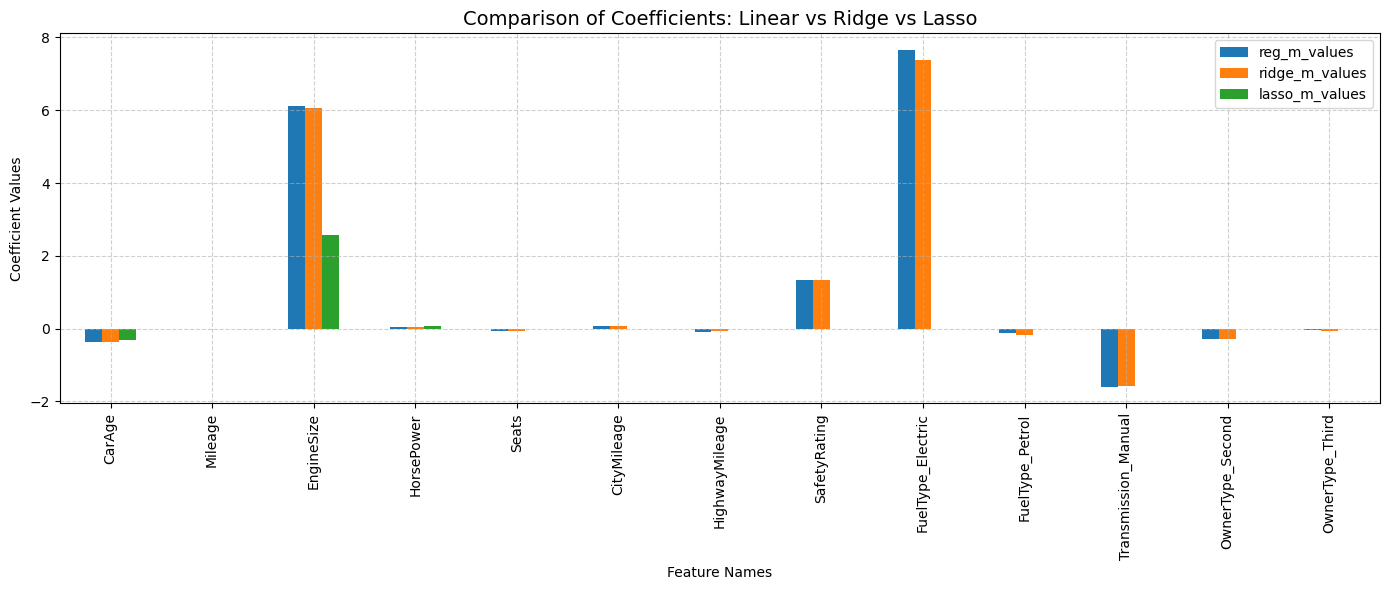

In [65]:
plt.figure(figsize=(12,6))
df.plot(x='column_names', kind='bar', figsize=(14,6))
plt.title('Comparison of Coefficients: Linear vs Ridge vs Lasso', fontsize=14)
plt.ylabel('Coefficient Values')
plt.xlabel('Feature Names')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

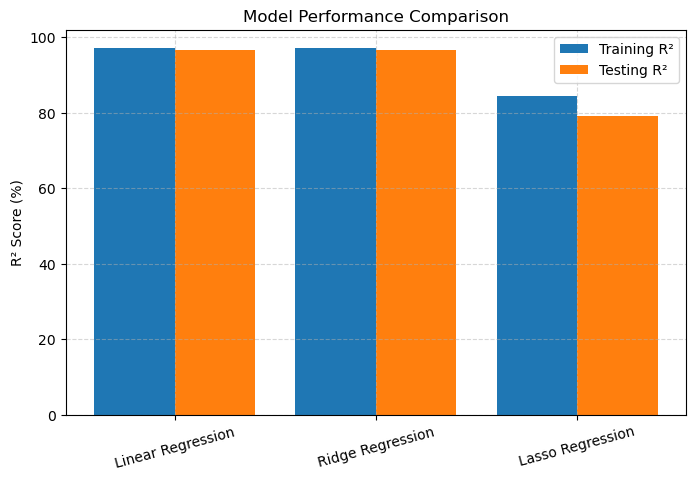

In [68]:
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
train_scores = [
    r2_score(y_train, reg.predict(x_train))*100,
    r2_score(y_train, ridge.predict(x_train))*100,
    r2_score(y_train, lasso.predict(x_train))*100
]
test_scores = [
    r2_score(y_test, reg.predict(x_test))*100,
    r2_score(y_test, ridge.predict(x_test))*100,
    r2_score(y_test, lasso.predict(x_test))*100
]

plt.figure(figsize=(8,5))
x_axis = np.arange(len(models))
plt.bar(x_axis - 0.2, train_scores, width=0.4, label='Training R²')
plt.bar(x_axis + 0.2, test_scores, width=0.4, label='Testing R²')
plt.xticks(x_axis, models, rotation=15)
plt.ylabel('R² Score (%)')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()